In [208]:
#!pip install pandas-profiling

In [209]:
#!pip install -U --pre pycaret

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [106]:
meta_data= pd.read_csv('movies_metadata.csv')
meta_data

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

In [107]:
meta_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [108]:
meta_data['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, '104.0', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo',
       'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', '68.0', 'uz', 'sm', 'mt',
       '82.0', 'hy', 'iu', 'lb', 'si'], dtype=object)

In [109]:
meta_data['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [110]:
meta_data = meta_data[(meta_data['adult'] == 'True') | (meta_data['adult'] == 'False')]

In [111]:
meta_data['adult'].unique()

array(['False', 'True'], dtype=object)

In [112]:
meta_data['vote_average'].unique()

array([ 7.7,  6.9,  6.5,  6.1,  5.7,  6.2,  5.4,  5.5,  6.6,  7.1,  7.8,
        7.2,  6.4,  6. ,  6.3,  7. ,  7.4,  7.6,  6.8,  7.3,  3.5,  6.7,
        8.1,  5.9,  5.2,  3. ,  5.8,  4.5,  4.4,  2.8,  4.1,  5.1,  3.9,
        7.5,  0. ,  7.9,  5.6,  3.3,  5.3,  4.3,  3.8,  5. ,  4. , 10. ,
        4.9,  4.6,  4.7,  2.5,  4.8,  8.2,  8.3,  8.5,  8. ,  2. ,  3.4,
        3.7,  4.2,  3.6,  2.7,  3.2,  2.9,  9. ,  9.3,  8.8,  8.7,  1.5,
        1.7,  3.1,  1. ,  8.4,  2.4,  8.6,  8.9,  1.2,  1.6,  2.3,  1.3,
        1.9,  0.5,  2.1,  2.6,  9.1,  1.8,  9.5,  9.2,  9.6,  2.2,  nan,
        1.4,  9.8,  9.4,  0.7,  1.1])

In [113]:
meta_data.describe()

revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000

In [114]:
meta_data.corr()

revenue   runtime  vote_average  vote_count
revenue       1.000000  0.103917      0.083868    0.812022
runtime       0.103917  1.000000      0.158146    0.113539
vote_average  0.083868  0.158146      1.000000    0.123607
vote_count    0.812022  0.113539      0.123607    1.000000

In [115]:
meta_data['release_date'].unique()

array(['1995-10-30', '1995-12-15', '1995-12-22', ..., '1904-03-05',
       '1991-05-13', '1917-10-21'], dtype=object)

In [116]:
df = meta_data[['popularity','adult','release_date','video','revenue', 'runtime','vote_count','vote_average' ]]

In [117]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [118]:
import datetime 

currentDate = datetime.date.today()

currentDate.strftime("%Y")

'2022'

In [119]:
span = []
for i in df['release_date'].dt.year:
    x = int(currentDate.strftime("%Y")) - i
    span.append(x)

In [120]:
df['year_span'] = span


In [121]:
df

popularity  adult release_date  video      revenue  runtime  vote_count  \
0      21.946943  False   1995-10-30  False  373554033.0     81.0      5415.0   
1      17.015539  False   1995-12-15  False  262797249.0    104.0      2413.0   
2        11.7129  False   1995-12-22  False          0.0    101.0        92.0   
3       3.859495  False   1995-12-22  False   81452156.0    127.0        34.0   
4       8.387519  False   1995-02-10  False   76578911.0    106.0       173.0   
...          ...    ...          ...    ...          ...      ...         ...   
45461   0.072051  False          NaT  False          0.0     90.0         1.0   
45462   0.178241  False   2011-11-17  False          0.0    360.0         3.0   
45463   0.903007  False   2003-08-01  False          0.0     90.0         6.0   
45464   0.003503  False   1917-10-21  False          0.0     87.0         0.0   
45465   0.163015  False   2017-06-09  False          0.0     75.0         0.0   

       vote_average  year_span  
0               7.7       27.0  
1               6.9       27.0  
2               6.5       27.0  
3               6.1       27.0  
4               5.7       27.0  
...             ...        ...  
45461           4.0        NaN  
45462           9.0       11.0  
45463           3.8       19.0  
45464           0.0      105.0  
45465           0.0        5.0  

[45463 rows x 9 columns]

In [122]:
df.drop(['release_date'], inplace=True, axis=1)

In [123]:
df

popularity  adult  video      revenue  runtime  vote_count  \
0      21.946943  False  False  373554033.0     81.0      5415.0   
1      17.015539  False  False  262797249.0    104.0      2413.0   
2        11.7129  False  False          0.0    101.0        92.0   
3       3.859495  False  False   81452156.0    127.0        34.0   
4       8.387519  False  False   76578911.0    106.0       173.0   
...          ...    ...    ...          ...      ...         ...   
45461   0.072051  False  False          0.0     90.0         1.0   
45462   0.178241  False  False          0.0    360.0         3.0   
45463   0.903007  False  False          0.0     90.0         6.0   
45464   0.003503  False  False          0.0     87.0         0.0   
45465   0.163015  False  False          0.0     75.0         0.0   

       vote_average  year_span  
0               7.7       27.0  
1               6.9       27.0  
2               6.5       27.0  
3               6.1       27.0  
4               5.7       27.0  
...             ...        ...  
45461           4.0        NaN  
45462           9.0       11.0  
45463           3.8       19.0  
45464           0.0      105.0  
45465           0.0        5.0  

[45463 rows x 8 columns]

In [131]:
for i in df.columns:
    print(df[i].isna().sum())

0
0
0
0
0
0
0
0


In [130]:
df = df.dropna()
df

popularity  adult  video      revenue  runtime  vote_count  \
0      21.946943  False  False  373554033.0     81.0      5415.0   
1      17.015539  False  False  262797249.0    104.0      2413.0   
2        11.7129  False  False          0.0    101.0        92.0   
3       3.859495  False  False   81452156.0    127.0        34.0   
4       8.387519  False  False   76578911.0    106.0       173.0   
...          ...    ...    ...          ...      ...         ...   
45460   5.683753  False  False          0.0    104.0        26.0   
45462   0.178241  False  False          0.0    360.0         3.0   
45463   0.903007  False  False          0.0     90.0         6.0   
45464   0.003503  False  False          0.0     87.0         0.0   
45465   0.163015  False  False          0.0     75.0         0.0   

       vote_average  year_span  
0               7.7       27.0  
1               6.9       27.0  
2               6.5       27.0  
3               6.1       27.0  
4               5.7       27.0  
...             ...        ...  
45460           5.7       31.0  
45462           9.0       11.0  
45463           3.8       19.0  
45464           0.0      105.0  
45465           0.0        5.0  

[45130 rows x 8 columns]

In [132]:
for i in df.columns:
    print(i, df[i].isna().sum())

popularity 0
adult 0
video 0
revenue 0
runtime 0
vote_count 0
vote_average 0
year_span 0


In [138]:
len(df[df['revenue'] == 0.0]['revenue'])

37729

In [139]:
df.drop(['revenue'],inplace = True, axis=True)
df

popularity  adult  video  runtime  vote_count  vote_average  year_span
0      21.946943  False  False     81.0      5415.0           7.7       27.0
1      17.015539  False  False    104.0      2413.0           6.9       27.0
2        11.7129  False  False    101.0        92.0           6.5       27.0
3       3.859495  False  False    127.0        34.0           6.1       27.0
4       8.387519  False  False    106.0       173.0           5.7       27.0
...          ...    ...    ...      ...         ...           ...        ...
45460   5.683753  False  False    104.0        26.0           5.7       31.0
45462   0.178241  False  False    360.0         3.0           9.0       11.0
45463   0.903007  False  False     90.0         6.0           3.8       19.0
45464   0.003503  False  False     87.0         0.0           0.0      105.0
45465   0.163015  False  False     75.0         0.0           0.0        5.0

[45130 rows x 7 columns]

In [175]:
for i in df.columns:
    x = (df[i] == 0).sum()
    print(x)

20
0
45042
1535
2757
2855
0


In [188]:
df['popularity'] = df['popularity'].astype(float)

In [202]:
df['popularity']= df['popularity'].replace(0.0, df['popularity'].median())
df['vote_count'] = df['vote_count'].replace(0.0, df['vote_count'].median())
df['vote_average'] = df['vote_average'].replace(0.0, df['vote_average'].median())

In [262]:
df['runtime'] = df['runtime'].replace(0.0, df['runtime'].median())

In [264]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [265]:
df[['popularity','runtime','vote_count','vote_average', 'year_span']]

popularity  runtime  vote_count  vote_average  year_span
0       21.946943     81.0      5415.0           7.7       27.0
1       17.015539    104.0      2413.0           6.9       27.0
2       11.712900    101.0        92.0           6.5       27.0
3        3.859495    127.0        34.0           6.1       27.0
4        8.387519    106.0       173.0           5.7       27.0
...           ...      ...         ...           ...        ...
45460    5.683753    104.0        26.0           5.7       31.0
45462    0.178241    360.0         3.0           9.0       11.0
45463    0.903007     90.0         6.0           3.8       19.0
45464    0.003503     87.0        10.0           6.0      105.0
45465    0.163015     75.0        10.0           6.0        5.0

[45130 rows x 5 columns]

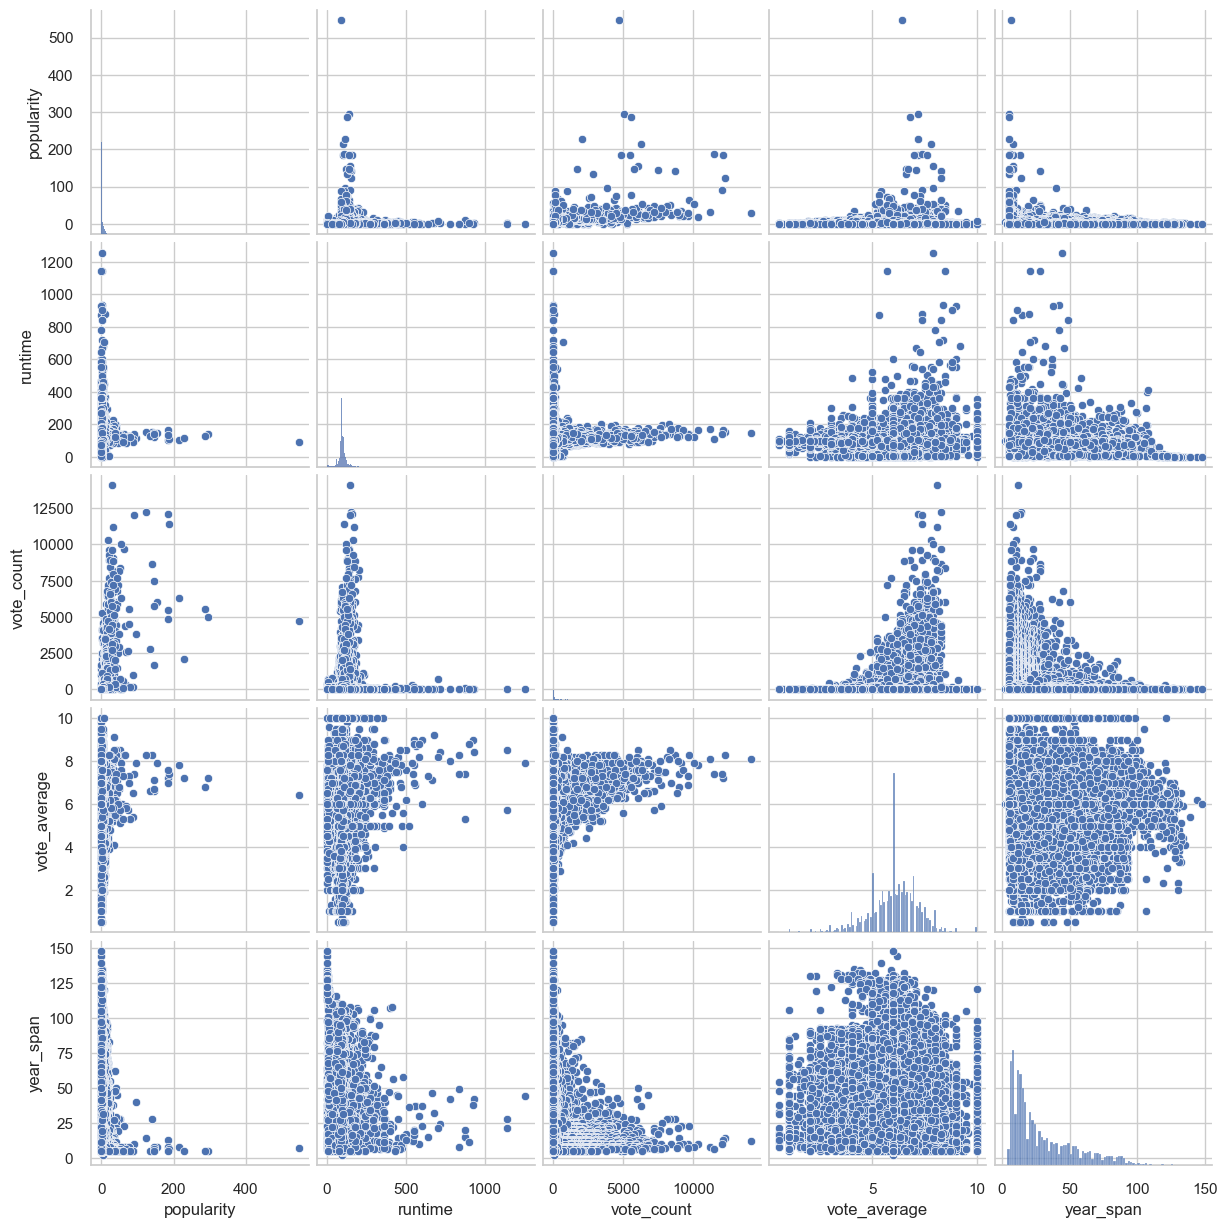

In [266]:
%matplotlib inline
sns.pairplot(df2[['popularity','runtime','vote_count','vote_average', 'year_span']])

In [23]:
#!pip install pycaret

In [127]:
from pycaret.regression import *

In [256]:
s = setup(df, target='vote_average', session_id=3487)


In [ ]:
s

In [257]:
best = compare_models()

Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [220]:
light_gbm_model = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [221]:
gbr_model = create_model('gbr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [222]:
ada_model = create_model('ada')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [234]:
tuned_light_gbm_model = tune_model(light_gbm_model, optimize='MSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [235]:
print(tuned_light_gbm_model)

LGBMRegressor(random_state=3487)


In [238]:
tuned_ada_model = tune_model(ada_model, optimize='MSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [239]:
print(tuned_ada_model)

AdaBoostRegressor(learning_rate=0.01, n_estimators=140, random_state=3487)


In [240]:
tuned_gbr_model = tune_model(gbr_model, optimize='MSE')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [241]:
print(tuned_gbr_model)

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_features=1.0,
                          min_impurity_decrease=0.2, min_samples_leaf=5,
                          min_samples_split=10, random_state=3487,
                          subsample=0.85)


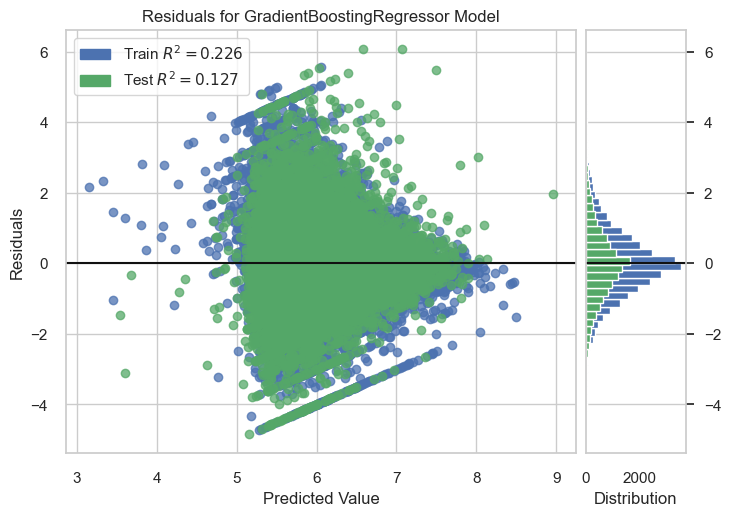

In [242]:
plot_model(tuned_gbr_model)

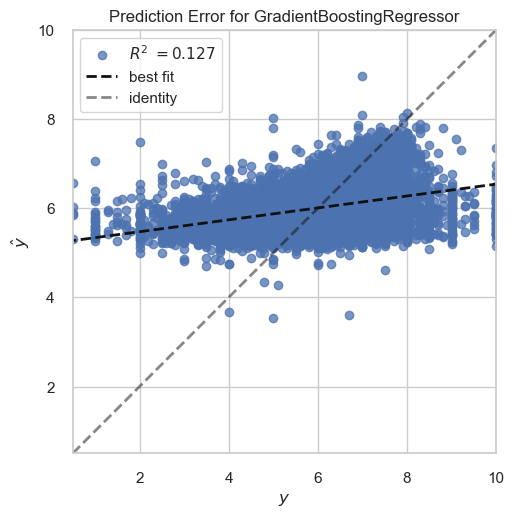

In [243]:
plot_model(tuned_gbr_model, plot = 'error')

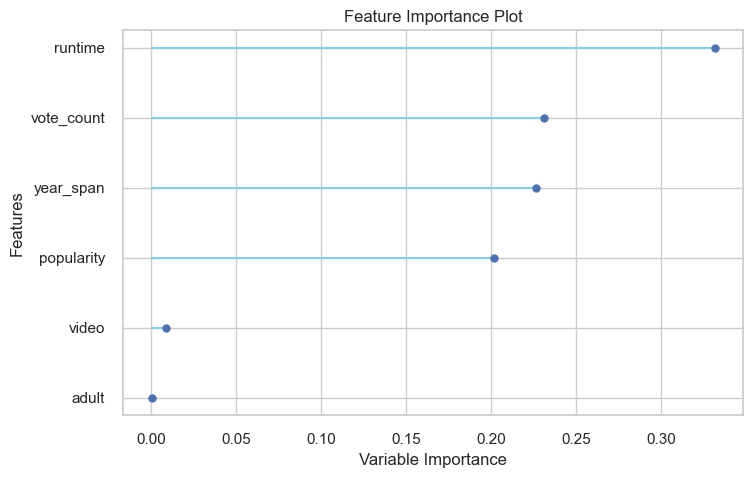

In [244]:
plot_model(tuned_gbr_model, plot='feature')

In [247]:
evaluate_model(tuned_gbr_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [248]:
predict_model(tuned_gbr_model)

popularity  adult  video  runtime  vote_count  year_span  vote_average  \
31590   20.720114    0.0    0.0      0.0       122.0        5.0           6.3   
31591    0.140197    0.0    0.0    100.0         1.0       32.0           8.0   
31592    0.814722    0.0    0.0    108.0         4.0       19.0           4.5   
31593    6.837575    0.0    0.0      0.0       107.0        8.0           4.9   
31594    2.388788    0.0    0.0    130.0        10.0       39.0           6.2   
...           ...    ...    ...      ...         ...        ...           ...   
45125    4.275536    0.0    0.0    105.0        53.0       15.0           5.2   
45126    8.755413    0.0    0.0     90.0        23.0       41.0           6.1   
45127   17.645878    0.0    0.0    117.0       795.0        5.0           7.1   
45128    6.097929    0.0    0.0    100.0        70.0       56.0           7.1   
45129    8.199069    0.0    0.0     88.0        67.0       18.0           5.5   

       prediction_label  
31590          6.842580  
31591          5.464016  
31592          5.831901  
31593          6.561176  
31594          6.011562  
...                 ...  
45125          6.177480  
45126          5.669755  
45127          6.451942  
45128          6.919094  
45129          5.655890  

[13540 rows x 8 columns]